In [4]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm
os.chdir('../')
from python_code import glm_fitter as gd
from scipy.stats import binom
import matplotlib.style as style
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [5]:
betas = np.array([-0.5,-0.5])
num_points = 1000
X = np.ones((num_points, len(betas)))
X[:,1] = np.random.uniform(-10, 10, size=num_points)
p = 1 / (1 + np.exp(-X@betas.reshape(-1, 1)))
y = binom.rvs(1, p).flatten()


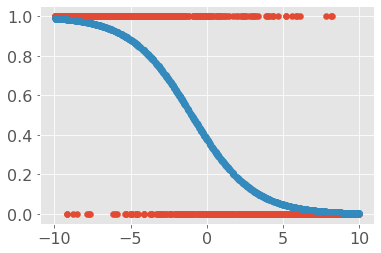

In [6]:
plt.scatter(X[:,1], y)
plt.scatter(X[:,1], p);


In [7]:
beta_1 = np.linspace(-3, 3,100)
beta_2 = np.linspace(-3,3,100)
bb_1, bb_2 = np.meshgrid(beta_1, beta_2)
betas = np.vstack((bb_1.flatten(), bb_2.flatten()))


In [12]:
fitter = gd.LogisticRegression(fit_intercept=True)
fitter.fit(X[:,1].reshape(-1,1), y)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:00<00:00, 14316.57it/s]


'Max iter exceeded'

In [15]:
logs = []
for i in range(betas.shape[1]):
    log_likes = fitter._calculate_log_likelihood(y, X, betas[:,i])
    logs.append(log_likes)
    y_pred = fitter._get_mu(X, betas[:,i])
    

AttributeError: 'LogisticRegression' object has no attribute 'betas_it'

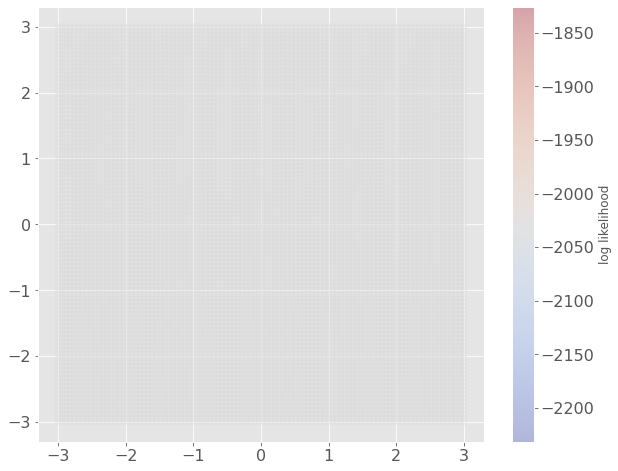

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(betas[0,:], betas[1,:], c=np.array(logs) ,cmap='coolwarm', alpha=.3)
cbar = plt.colorbar()
cbar.set_label('log likelihood')
for beta in fitter.betas_it:
    plt.scatter(beta[0],beta[1], color='white', marker='x',s=50)
plt.scatter(betas[0,:][np.argmax(np.array(logs))], betas[1,:][np.argmax(np.array(logs))],color='black',s=200, marker='+', label='max likelihood')
#plt.legend()   
plt.xlabel('beta_1')
plt.ylabel('beta_2');


In [18]:
data = pd.read_csv('../data/wdbc.csv', header=None)
data.iloc[:,1] = (data.iloc[:,1] == 'M').astype(int)


FileNotFoundError: [Errno 2] No such file or directory: '../data/wdbc.csv'

In [ ]:
data


In [19]:
X = np.array(data.iloc[:,2:13])
y = np.array(data.iloc[:,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'data' is not defined

In [20]:
fitter = gd.LogisticRegression(fit_intercept=False, learning_rate=0.0000001, max_iteration = 10000000)
fitter.fit(X_train, y_train)
y_pred = fitter.predict(X_test)


NameError: name 'X_train' is not defined

In [ ]:
fitter.betas

In [ ]:
clf = LogisticRegression(fit_intercept=False)
clf.fit(X_train, y_train)
clf.coef_

In [ ]:
plt.plot(fitter.log_likelihood)

In [ ]:
accuracy_score(y_test, y_pred)


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
#try linear regression
from scipy.stats import norm
slope, intercept = 2,2
X = np.linspace(0,10,100)
y = slope*X + intercept + norm(0,1).rvs(100) 


In [ ]:
plt.scatter(X, y)


In [ ]:
lr=gd.LinearRegression(fit_intercept=True, learning_rate = 0.000001, max_iteration=1000000)
lr.fit(X.reshape(-1,1), y)


In [ ]:
lr.betas


In [ ]:
num_points = 100
beta_1 = np.linspace(-5, 5, num_points)
beta_2 = np.linspace(-5, 5, num_points)
bb_1, bb_2 = np.meshgrid(beta_1, beta_2)
betas = np.vstack((bb_1.flatten(), bb_2.flatten()))


In [ ]:
X = np.linspace(0,10,100)
column_ones = np.ones_like(X)
X = np.vstack((column_ones, X)).T
logs = []
for i in range(betas.shape[1]):
    log_likes = lr._calculate_log_likelihood(y, X@betas[:,i])
    logs.append(log_likes)
    

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(betas[0,:], betas[1,:], c=np.array(logs) ,cmap='coolwarm', alpha=.3)
cbar = plt.colorbar()
cbar.set_label('log likelihood')
for i,beta in enumerate(lr.betas_it):
    if i % 1000 == 0:
        plt.scatter(beta[0],beta[1], color='white', marker='x',s=100)
plt.scatter(betas[0,:][np.argmax(np.array(logs))], betas[1,:][np.argmax(np.array(logs))],color='black',s=200, marker='+', label='max likelihood')
#plt.legend()   
plt.xlabel('beta_1')
plt.ylabel('beta_2');